# **🧠 Synthetic Chest X-ray Image Generation Using GANs for Privacy-Preserving Medical AI**

#  **Project Overview:**

With the increasing reliance on AI in healthcare, access to large, diverse, and privacy-compliant medical datasets is critical. However, strict data protection laws (like HIPAA and GDPR) make sharing real patient data challenging.

This project aims to address this issue by generating **synthetic chest X-ray images** using a **Generative Adversarial Network (GAN)**. The synthetic images mimic real medical data but do **not contain any identifiable patient information**, thereby enabling safer use for training AI diagnostic systems, model prototyping, and research collaborations.

The project uses the **Chest X-ray Pneumonia dataset** from Kaggle, resizes the images to **28x28** for fast prototyping, and trains a GAN built with **TensorFlow/Keras** to generate realistic grayscale X-ray images.

---

## 🎯 **Objectives:**
- Train a GAN model on real chest X-ray data to learn the distribution of medical images.
- Generate realistic synthetic X-rays to supplement or replace real data in AI training.
- Ensure privacy by not including any patient-identifiable information.
- Visualize training progress and evaluate quality of generated images.

---

## ⚙️ **Tech Stack:**
- **Language:** Python
- **Framework:** TensorFlow / Keras
- **OpenCV:** Image Processing
- **Pandas & Numpy**
- **Visualization:** Matplotlib
- **Data Source:** Kaggle (Chest X-ray Pneumonia Dataset)
- **Deployment Option (optional):** Streamlit/Gradio for showing image generations

---
## 🎯 **Image Format**
- **Size:** '28x28 pixels'
- **Channels:** Grayscale
- **Normalization:** '[-1, 1]' for GAN compatibility
---
## 🔍 **Key Features:**
- ✅ Data loading, cleaning, and resizing to 28x28 resolution  
- ✅ Basic EDA to understand class distribution and image variety  
- ✅ A **Deep Convolutional GAN (DCGAN)** architecture from scratch in Keras  
- ✅ Model training with loss tracking for both generator and discriminator  
- ✅ Visualization of real vs. synthetic X-rays at different epochs  
- ✅ Privacy-preserving approach — synthetic images are free from patient metadata  

---

## 📊 **Why This Project Matters:**
- Reduces reliance on real patient data
- Supports privacy in healthcare AI
- Builds foundational knowledge of **generative models in medicine**
- Provides a launching point for more advanced projects (e.g., 128x128 images, conditional GANs, differential privacy)

---

## 🔮 **Future Enhancements:**
- Train on larger images (e.g., 128x128) for more realistic results  
- Use **Conditional GANs** (cGANs) to generate specific pathologies (like only pneumonia cases)  
- Add **differential privacy mechanisms** to protect against data leakage  
- Deploy a web demo for researchers to explore the synthetic dataset

---

---

### ✅ Step 1: Choosing Dataset

I am using the **Chest X-ray Pneumonia Dataset** from Kaggle:
- It’s relatively small (good for Colab GPU)
- Contains **normal vs. pneumonia** X-ray images
- Ideal for learning image generation (GANs or VAEs)

#### 📁 Dataset Link:  
[Kaggle - Chest X-ray Pneumonia Dataset](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia)

---
Each subfolder has:
- `NORMAL/` - healthy chest X-rays
- `PNEUMONIA/` - infected chest X-rays

---

# **✅ Step 2: Uploading Required Libraries**

In [2]:
# 📦 Core Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from glob import glob
from sklearn.utils import shuffle
import imageio
import time
from IPython.display import clear_output

# 📈 Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Flatten, LeakyReLU
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Dropout, BatchNormalization
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.layers import Dense, Reshape, Flatten, BatchNormalization, Conv2D, Conv2DTranspose, LeakyReLU, Dropout

# 🛠️ Utilities
from tqdm.notebook import tqdm


---

# **🔄 Preparing Data for GAN Training (Made Simple)**

Before training a GAN, we need to get the chest X-ray images ready. Here's how we do it:

---

### 🧹 **Step-by-Step: Preprocessing the Images**

- **Load the Images:**  
  We collect X-ray images from two groups — **NORMAL** (healthy lungs) and **PNEUMONIA** (infected lungs).

- **Resize to 28x28 Pixels:**  
  All images are made the same size — small squares of **28 by 28 pixels**. This makes it easier for the AI to understand and learn from the data.

- **Normalize the Image Values:**  
  We adjust the pixel values so they fall between **-1 and 1**. This helps the AI learn faster and more accurately. (This is especially important because of how the AI’s brain—called the generator—produces images.)

- **Save in NumPy Arrays:**  
  Once the images are ready, we store them in a format (called a NumPy array) that makes it easy to group them into batches and feed them into the model during training.

---

This preparation helps the GAN model learn effectively and generate realistic synthetic chest X-ray images later on.


### Loading Data on Colab

In [3]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

!ls "/content/drive/MyDrive"

Mounted at /content/drive
'Bloomberg Client Service Job Simulation.gdoc'	'Parasol Training - Intros and About Me.gdoc'
'Citi Job Simulation.gdoc'			'Parasol Training - Intros and About Me.pdf'
'Colab Notebooks'				 Projects
'Electronics Art Job Simulation.gdoc'		'Risk Assessment Report.gdoc'
 oh.gdoc					'Untitled document.gdoc'


In [4]:
# sTEP 2: Define path to the chest_xray folder

import os

base_path = '/content/drive/My Drive/Projects/chest_xray'
train_path = os.path.join(base_path, 'train')
test_path = os.path.join(base_path, 'test')
val_path = os.path.join(base_path, 'val')

In [6]:
# Check NORMAL & PNEUMONIA folder paths
print("NORMAL Folder exists:", os.path.exists(os.path.join(train_path, "NORMAL")))
print("PNEUMONIA Folder exists:", os.path.exists(os.path.join(train_path, "PNEUMONIA")))

# Confirming if files exists in the folder

print('There are:',os.listdir(train_path), 'folders in the train folder')
print('There are:',os.listdir(test_path), 'folders in the test folder')
print('There are:',os.listdir(val_path), 'folders in the val folder')

# List Sample Files from Each Folders
print("NORMAL images in train:", os.listdir(os.path.join(train_path, 'NORMAL'))[:3])
print("PNEUMONIA images in train:", os.listdir(os.path.join(train_path, 'PNEUMONIA'))[:3])


NORMAL Folder exists: True
PNEUMONIA Folder exists: True
There are: ['NORMAL', 'PNEUMONIA'] folders in the train folder
There are: ['NORMAL', 'PNEUMONIA'] folders in the test folder
There are: ['PNEUMONIA', 'NORMAL'] folders in the val folder
NORMAL images in train: ['IM-0512-0001.jpeg', 'IM-0508-0001.jpeg', 'IM-0519-0001-0002.jpeg']
PNEUMONIA images in train: ['person596_bacteria_2446.jpeg', 'person583_virus_1127.jpeg', 'person531_bacteria_2240.jpeg']


---
# **🛠️ Image Preprocessing**

Image preprocessing is the step where we **prepare raw images** so an AI model can understand them. For chest X-rays, this usually means:

- **Resizing** all images to the same size (like 28x28 pixels)  
- **Converting** images to grayscale (black & white)  
- **Normalizing** pixel values to a standard range (e.g., -1 to 1)  
- **Labeling** each image (e.g., 0 for normal, 1 for pneumonia)  

This helps the model learn faster and more accurately from the data. And we can do this using a defined function.

---

###  **What the Image Preprocessing Function Does**

Before we can train our AI model, we need to clean and prepare the X-ray images. This function helps us do that.

---

### 🔍 **Breaking it Down:**

- **`data_dir`**:  
  This just means **where the images are stored** on your computer or in the cloud. It points to folders that contain the X-rays — one for **NORMAL** and one for **PNEUMONIA** cases.

- **`img_size`** (e.g., 28x28):  
  Every image is resized to this same square size. This is important because AI models need all images to be the same size to process them correctly.

- **`images` and `labels` lists**:  
  As we go through each image, we:
  - Add the cleaned image to the `images` list.
  - Add a number (label) to the `labels` list:  
    - `0` means **normal**,  
    - `1` means **pneumonia**.

- **`label_map`**:  
  This is a simple dictionary that translates folder names into numbers:
  - `'NORMAL'` → `0`
  - `'PNEUMONIA'` → `1`  
  These numbers help the AI understand what each image represents.

---

Once this function is used, all your images are clean, resized, labeled, and ready to be used for training your model.

Image Resizing

In [7]:
# Set the target image size
IMAGE_SIZE = (28, 28)


Image Preprocessing Function

In [8]:
# Defining the image Preprocessing function
def load_and_preprocess_images(data_dir, img_size=(28, 28), limit=None):
    images = []
    labels = []
    label_map = {'NORMAL': 0, 'PNEUMONIA': 1}  # Label mapping

  # Looping Through the Directories
    for label in os.listdir(data_dir):  # Iterate through class directories
        class_dir = os.path.join(data_dir, label)

        if os.path.isdir(class_dir):  # Check if it's a directory
            img_files = os.listdir(class_dir)
            if limit:
                img_files = img_files[:limit]  # Apply the limit if specified
            for img_file in img_files:
                img_path = os.path.join(class_dir, img_file)

                # Read image
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is None:
                    print(f"Warning: Could not read image {img_path}")
                    continue

                # Resize the image
                img_resized = cv2.resize(img, img_size)

                # Normalize the image to the range [-1, 1]
                img_resized = (img_resized / 127.5) - 1.0

                images.append(img_resized)
                labels.append(label_map[label])

    return np.array(images), np.array(labels)


In [9]:
# Paths for the training, testing, and validation data
base_path = '/content/drive/My Drive/Projects/chest_xray'
train_path = os.path.join(base_path, 'train')
test_path = os.path.join(base_path, 'test')
val_path = os.path.join(base_path, 'val')

# **Loading and Preprocess the Data**:

- It ensures that all images are the same size and scale, making them compatible for training.

- It helps the model learn better and faster by organizing the data, normalizing it, and pairing it with the correct labels.

- It makes the training process more efficient and stable by batching and shuffling the data.

- Without these preprocessing steps, the model would struggle to learn or even fail to process the images effectively.

---


1. **`train_images, train_labels`** and **`test_images, test_labels`**:
   - These are **variables** where we will store the data after processing.
   - **`train_images`** holds the actual image data for training.
   - **`train_labels`** holds the labels for each training image, like "Normal" or "Pneumonia".
   - Similarly, **`test_images`** and **`test_labels`** will store test data for evaluation purposes.

---

#### In Summary:
- We are loading and processing both **training** and **test** data using the `load_and_preprocess_images()` function.
- The training data has a limit of 1000 images to make it easier to handle, and both training and testing images are resized, normalized, and labeled.


In [10]:
# Load training and test data
train_images, train_labels = load_and_preprocess_images(train_path, limit=1000)
test_images, test_labels = load_and_preprocess_images(test_path)



Printing the current Shapes of the Data

In [11]:
# Print shapes of the processed datasets
print("Train Images Shape:", train_images.shape)
print("Train Labels Shape:", train_labels.shape)
print("Test Images Shape:", test_images.shape)
print("Test Labels Shape:", test_labels.shape)


Train Images Shape: (2000, 28, 28)
Train Labels Shape: (2000,)
Test Images Shape: (624, 28, 28)
Test Labels Shape: (624,)


---

# **🖼️ Reshaping Images for the AI Model**

Currently, the image data has the shape as shown in the output above:

- **Train images:** `(2000, 28, 28)`  
- **Test images:** `(624, 28, 28)`

This means:
- `2000` / `624` → Number of images (batch size)  
- `28 x 28` → Height and width of each image (in pixels)

---

### ❗ Why This Is a Problem

These images are **3D**, but most deep learning models (like GANs or CNNs) expect **4D input** in this format:

```
(batch_size, height, width, channels)
```

Since chest X-ray images are **grayscale**, they only have **1 channel** — but right now, that channel is missing.

---

### ✅ The Fix: Addig the Channel Dimension

To fix this, we add a channel using:

```python
np.expand_dims(images, axis=-1)
```

This transforms the shape to:

```
(2000, 28, 28, 1)
```

Where:
- `2000` → Number of images  
- `28 x 28` → Image size  
- `1` → Channel (for grayscale)

---

### ✅ Now the model can understand:
> “Each image is 28x28 pixels and has 1 channel — it’s a grayscale X-ray.”

---

In [12]:
# Add channel dimension for CNNs: (N, 28, 28, 1)
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)


Printing The New Shape

In [13]:
print("Train Images Shape with channel:", train_images.shape)
print("Test Images Shape with channel:", test_images.shape)

Train Images Shape with channel: (2000, 28, 28, 1)
Test Images Shape with channel: (624, 28, 28, 1)


---

# 📦 **Batching the Data for GAN Training**

In this step, we’ll organize the data into smaller **batches** to train our GAN more efficiently.

---

### **Why Batching Matters:**

- **Efficiency:** Training on smaller batches (instead of the entire dataset at once) speeds up the process. It also makes the process more memory-efficient, especially with large datasets.
  
- **Consistent Updates:** During GAN training, both the generator and discriminator need to receive updates regularly. Batching ensures that they get those updates consistently and at the right intervals.

---

### **How Does TensorFlow Help?**

TensorFlow provides the `tf.data` API, which allows us to:
1. **Shuffle the data** to randomize the order (this prevents the model from learning in a biased order).
2. **Batch the data** so that the model processes a manageable number of images at a time.

---




In [15]:
# Function to define batching

def preprocess_and_batch_data(images, batch_size=32):
    """ Preprocess data for GAN and return batched dataset. """
    # Normalize the images (already done in preprocessing above)
    images = tf.convert_to_tensor(images, dtype=tf.float32)

    # Create a batched dataset
    dataset = tf.data.Dataset.from_tensor_slices(images)
    dataset = dataset.shuffle(buffer_size=10000).batch(batch_size, drop_remainder=True)

    return dataset

# Prepare training and testing datasets
train_dataset = preprocess_and_batch_data(train_images)
test_dataset = preprocess_and_batch_data(test_images)

# Show example of the dataset structure
for batch in train_dataset.take(1):
    print(f"Batch shape: {batch.shape}")


Batch shape: (32, 28, 28, 1)


So, the batch shape `(32, 28, 28, 1)` means you have a batch of 32 grayscale images, each 28x28 pixels.

# **🧠 Defining the GAN Architecture**

A **Generative Adversarial Network (GAN)** consists of two neural networks that compete against each other:

1. **The Generator** creates fake data (images in this case) to deceive the second network.
2. **The Discriminator** tries to differentiate between real and fake data.

These networks are trained simultaneously, with the **generator trying to improve** its ability to create realistic images and the **discriminator improving** its ability to tell real from fake.

### **Generator Architecture:**

The **Generator** tries to “create” a chest X-ray image from random noise, which the discriminator will then evaluate.



In [16]:
#Generator Architecture
from tensorflow.keras.layers import Dense, Reshape, Flatten, BatchNormalization, Conv2D, Conv2DTranspose, LeakyReLU, Dropout
from tensorflow.keras import layers, models

def build_generator(noise_dim=100):
    model = models.Sequential(name="Generator")

    model.add(layers.Dense(7*7*128, use_bias=False, input_shape=(noise_dim,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 128)))  # Reshape into a small image
    assert model.output_shape == (None, 7, 7, 128)

    model.add(layers.Conv2DTranspose(64, kernel_size=5, strides=1, padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(32, kernel_size=5, strides=2, padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, kernel_size=5, strides=2, padding='same', use_bias=False, activation='tanh'))

    return model

# Instantiate the generator
generator = build_generator()
generator.summary()



Model: "Generator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 6272)                │         627,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 6272)                │          25,088 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_1 (Reshape)                  │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_3 (Conv2DTranspose) │ (None, 7, 7, 64)            │         204,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 7, 7, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_4 (Conv2DTranspose) │ (None, 14, 14, 32)          │          51,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 14, 14, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_5 (Conv2DTranspose) │ (None, 28, 28, 1)           │             800 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 909,472 (3.47 MB)

 Trainable params: 896,736 (3.42 MB)

 Non-trainable params: 12,736 (49.75 KB)

**Discriminator:**

- Takes an image as input (either real or generated)

- Outputs a probability score indicating whether the image is real or fake

In [17]:
# Discriminator Architecture

def build_discriminator():
    model = models.Sequential(name="Discriminator")

    model.add(layers.Conv2D(64, kernel_size=5, strides=2, padding='same',
                            input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, kernel_size=5, strides=2, padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1, activation='sigmoid'))  # Outputs a single probability

    return model

# Instantiate the discriminator
discriminator = build_discriminator()
discriminator.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "Discriminator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 14, 14, 64)          │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_6 (LeakyReLU)            │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 7, 7, 128)           │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_7 (LeakyReLU)            │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │           6,273 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 212,865 (831.50 KB)

 Trainable params: 212,865 (831.50 KB)

 Non-trainable params: 0 (0.00 B)

---
# **Creating the Loss Functions and Optimizers**

After we’ve defined the **Generator** and **Discriminator** parts of the GAN, we need to tell the model how well it’s doing during training. This is where **loss functions** and **optimizers** come in.

#### **Loss Functions:**

A **loss function** helps us measure how far off the model's predictions are from the truth. In GANs, the **Discriminator** has a task of deciding whether an image is **real** (from the dataset) or **fake** (generated by the Generator).

We use a **binary cross-entropy loss** because the task is like a **yes/no question** — is the image real or fake? This loss function helps the Discriminator figure out if it’s making the right decision or not.

#### **Optimizers:**

**Optimizers** are like guides that help the model improve by adjusting its parameters based on the loss. We use them to make the Generator and Discriminator better at their tasks over time.

In simple terms:
- **Loss functions** measure how wrong the model is.
- **Optimizers** help the model learn from its mistakes and get better.

---

In [43]:
# Loss functions for the generator and discriminatorLoss Functions
# Binary Cross-Entropy Loss:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=False)


Define Loss for Discriminator and Generator

In [44]:

# Discriminator Loss
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)   # Real images = 1
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)  # Fake images = 0
    total_loss = real_loss + fake_loss
    return total_loss

# Generator Loss
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)  # Try to trick discriminator


 Define the Optimizers

In [45]:
# Optimizers for both generator and discriminator
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

**Gradient Clipping (optional):**

GAN training can sometimes lead to exploding gradients, and adding gradient clipping to the optimizers could help

In [46]:
# Optimizers for both generator and discriminator with gradient clipping
generator_optimizer = tf.keras.optimizers.Adam(1e-4, clipvalue=1.0)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4, clipvalue=1.0)


Save Checkpoints (Optional but Recommended)
To resume training later or avoid loss of progress:

In [47]:
import os

checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")

checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)


# **⚙️ Compile and Train the GAN**

**⚙️ Training Configuration**

In [48]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Set the noise dimension (e.g., 100)
noise_dim = 100  # Add this line

# Track losses for both the discriminator and generator
def train_step(real_images):
    batch_size = real_images.shape[0] # Get batch size from real_images shape
    noise = tf.random.normal([batch_size, noise_dim])  # Generate noise for the generator
    with tf.GradientTape() as disc_tape, tf.GradientTape() as gen_tape:

        # Forward pass through the discriminator and generator
        generated_images = generator(noise, training=True)
        real_output = discriminator(real_images, training=True)
        fake_output = discriminator(generated_images, training=True)

        # Compute losses for discriminator and generator
        disc_loss = discriminator_loss(real_output, fake_output)
        gen_loss = generator_loss(fake_output)

    # Compute gradients and update weights
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)

    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))

    return disc_loss, gen_loss, generated_images

# **The Full Training Loop**
This loop runs the train_step() function over many epochs (training rounds), going through all batches of your dataset during each epoch.

In this model Epoch = 100

Epoch 1/100 completed. Gen Loss: 0.5681, Disc Loss: 1.5760
Epoch 2/100 completed. Gen Loss: 0.7586, Disc Loss: 1.3029
Epoch 3/100 completed. Gen Loss: 0.6358, Disc Loss: 1.4343
Epoch 4/100 completed. Gen Loss: 0.7973, Disc Loss: 1.2384
Epoch 5/100 completed. Gen Loss: 0.7842, Disc Loss: 1.4426
Epoch 6/100 completed. Gen Loss: 0.7760, Disc Loss: 1.2299
Epoch 7/100 completed. Gen Loss: 0.6947, Disc Loss: 1.3442
Epoch 8/100 completed. Gen Loss: 0.7910, Disc Loss: 1.3299
Epoch 9/100 completed. Gen Loss: 0.7327, Disc Loss: 1.5032
Epoch 10/100 completed. Gen Loss: 0.8398, Disc Loss: 1.2067


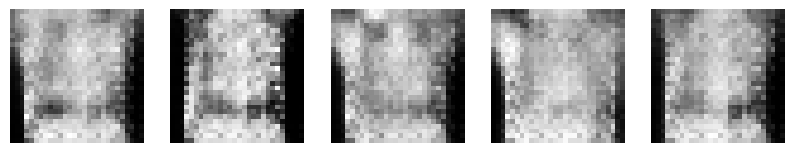

Epoch 11/100 completed. Gen Loss: 0.6850, Disc Loss: 1.3301
Epoch 12/100 completed. Gen Loss: 0.7588, Disc Loss: 1.4404
Epoch 13/100 completed. Gen Loss: 0.7967, Disc Loss: 1.3221
Epoch 14/100 completed. Gen Loss: 0.7857, Disc Loss: 1.2208
Epoch 15/100 completed. Gen Loss: 0.6967, Disc Loss: 1.4903
Epoch 16/100 completed. Gen Loss: 0.8486, Disc Loss: 1.1318
Epoch 17/100 completed. Gen Loss: 0.9693, Disc Loss: 1.0588
Epoch 18/100 completed. Gen Loss: 0.6857, Disc Loss: 1.2444
Epoch 19/100 completed. Gen Loss: 0.7371, Disc Loss: 1.4087
Epoch 20/100 completed. Gen Loss: 0.9175, Disc Loss: 1.1517


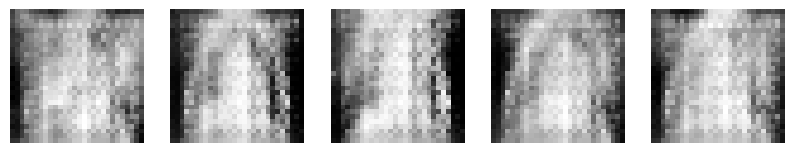

Epoch 21/100 completed. Gen Loss: 0.6301, Disc Loss: 1.3729
Epoch 22/100 completed. Gen Loss: 0.8750, Disc Loss: 1.2170
Epoch 23/100 completed. Gen Loss: 0.7150, Disc Loss: 1.3626
Epoch 24/100 completed. Gen Loss: 0.7790, Disc Loss: 1.2650
Epoch 25/100 completed. Gen Loss: 0.7640, Disc Loss: 1.3226
Epoch 26/100 completed. Gen Loss: 0.6826, Disc Loss: 1.3664
Epoch 27/100 completed. Gen Loss: 0.7031, Disc Loss: 1.3670
Epoch 28/100 completed. Gen Loss: 0.7401, Disc Loss: 1.3734
Epoch 29/100 completed. Gen Loss: 0.7734, Disc Loss: 1.3189
Epoch 30/100 completed. Gen Loss: 0.7643, Disc Loss: 1.3719


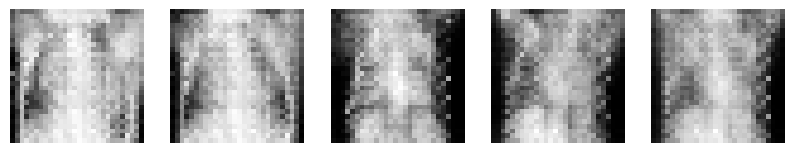

Epoch 31/100 completed. Gen Loss: 0.7439, Disc Loss: 1.5016
Epoch 32/100 completed. Gen Loss: 0.8328, Disc Loss: 1.2751
Epoch 33/100 completed. Gen Loss: 0.6068, Disc Loss: 1.5180
Epoch 34/100 completed. Gen Loss: 0.6767, Disc Loss: 1.4199
Epoch 35/100 completed. Gen Loss: 0.7922, Disc Loss: 1.1849
Epoch 36/100 completed. Gen Loss: 0.8215, Disc Loss: 1.2597
Epoch 37/100 completed. Gen Loss: 0.8143, Disc Loss: 1.1981
Epoch 38/100 completed. Gen Loss: 0.7465, Disc Loss: 1.3496
Epoch 39/100 completed. Gen Loss: 0.8375, Disc Loss: 1.1908
Epoch 40/100 completed. Gen Loss: 0.7703, Disc Loss: 1.3135


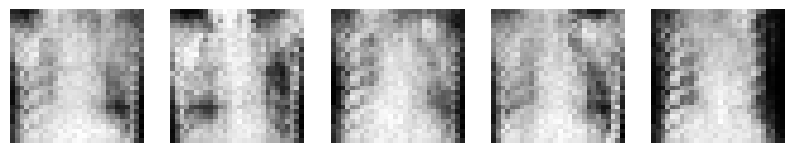

Epoch 41/100 completed. Gen Loss: 0.7713, Disc Loss: 1.2702
Epoch 42/100 completed. Gen Loss: 0.7913, Disc Loss: 1.3284
Epoch 43/100 completed. Gen Loss: 0.7760, Disc Loss: 1.3710
Epoch 44/100 completed. Gen Loss: 0.7477, Disc Loss: 1.3886
Epoch 45/100 completed. Gen Loss: 0.9706, Disc Loss: 1.1053
Epoch 46/100 completed. Gen Loss: 0.7121, Disc Loss: 1.2255
Epoch 47/100 completed. Gen Loss: 0.8343, Disc Loss: 1.2350
Epoch 48/100 completed. Gen Loss: 0.7720, Disc Loss: 1.3017
Epoch 49/100 completed. Gen Loss: 0.8099, Disc Loss: 1.2368
Epoch 50/100 completed. Gen Loss: 0.7280, Disc Loss: 1.2103


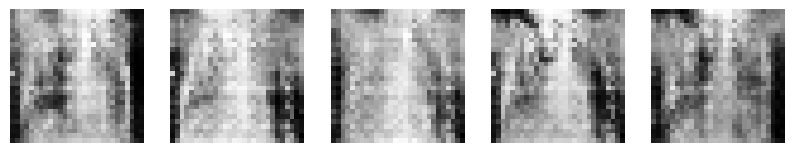

Epoch 51/100 completed. Gen Loss: 0.9921, Disc Loss: 1.0037
Epoch 52/100 completed. Gen Loss: 0.8070, Disc Loss: 1.2864
Epoch 53/100 completed. Gen Loss: 0.9880, Disc Loss: 1.0778
Epoch 54/100 completed. Gen Loss: 0.6685, Disc Loss: 1.3428
Epoch 55/100 completed. Gen Loss: 0.9201, Disc Loss: 1.2714
Epoch 56/100 completed. Gen Loss: 0.8587, Disc Loss: 1.3752
Epoch 57/100 completed. Gen Loss: 0.7670, Disc Loss: 1.5372
Epoch 58/100 completed. Gen Loss: 0.7944, Disc Loss: 1.4589
Epoch 59/100 completed. Gen Loss: 0.7148, Disc Loss: 1.3770
Epoch 60/100 completed. Gen Loss: 0.8172, Disc Loss: 1.2086


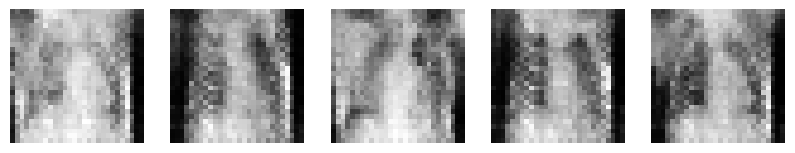

Epoch 61/100 completed. Gen Loss: 0.8025, Disc Loss: 1.3175
Epoch 62/100 completed. Gen Loss: 0.6795, Disc Loss: 1.7716
Epoch 63/100 completed. Gen Loss: 0.8346, Disc Loss: 1.2539
Epoch 64/100 completed. Gen Loss: 0.8022, Disc Loss: 1.3264
Epoch 65/100 completed. Gen Loss: 0.8667, Disc Loss: 1.1852
Epoch 66/100 completed. Gen Loss: 0.7077, Disc Loss: 1.4085
Epoch 67/100 completed. Gen Loss: 0.7814, Disc Loss: 1.2481
Epoch 68/100 completed. Gen Loss: 0.6988, Disc Loss: 1.2744
Epoch 69/100 completed. Gen Loss: 0.8158, Disc Loss: 1.1952
Epoch 70/100 completed. Gen Loss: 0.7852, Disc Loss: 1.3181


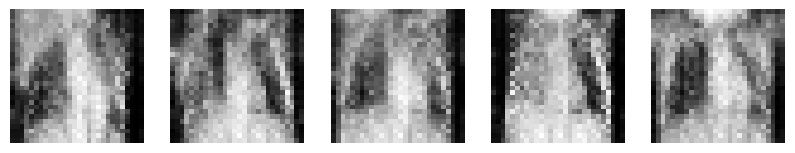

Epoch 71/100 completed. Gen Loss: 0.8826, Disc Loss: 1.2295
Epoch 72/100 completed. Gen Loss: 0.7845, Disc Loss: 1.3083
Epoch 73/100 completed. Gen Loss: 0.8230, Disc Loss: 1.2050
Epoch 74/100 completed. Gen Loss: 0.7981, Disc Loss: 1.2716
Epoch 75/100 completed. Gen Loss: 0.8096, Disc Loss: 1.3671
Epoch 76/100 completed. Gen Loss: 0.8025, Disc Loss: 1.3330
Epoch 77/100 completed. Gen Loss: 0.8235, Disc Loss: 1.1291
Epoch 78/100 completed. Gen Loss: 0.8115, Disc Loss: 1.2836
Epoch 79/100 completed. Gen Loss: 0.7710, Disc Loss: 1.4551
Epoch 80/100 completed. Gen Loss: 0.8107, Disc Loss: 1.4568


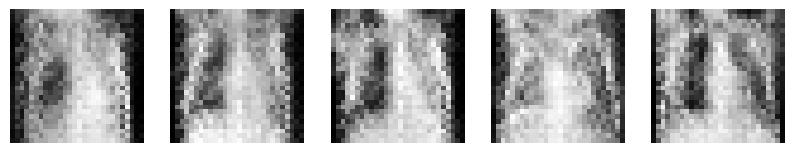

Epoch 81/100 completed. Gen Loss: 0.9664, Disc Loss: 0.9565
Epoch 82/100 completed. Gen Loss: 0.9362, Disc Loss: 1.2469
Epoch 83/100 completed. Gen Loss: 0.9695, Disc Loss: 1.3952
Epoch 84/100 completed. Gen Loss: 0.7512, Disc Loss: 1.2826
Epoch 85/100 completed. Gen Loss: 0.7128, Disc Loss: 1.5877
Epoch 86/100 completed. Gen Loss: 0.9124, Disc Loss: 0.9804
Epoch 87/100 completed. Gen Loss: 0.7005, Disc Loss: 1.5411
Epoch 88/100 completed. Gen Loss: 0.8630, Disc Loss: 1.2018
Epoch 89/100 completed. Gen Loss: 0.8834, Disc Loss: 1.2062
Epoch 90/100 completed. Gen Loss: 0.8383, Disc Loss: 1.1337


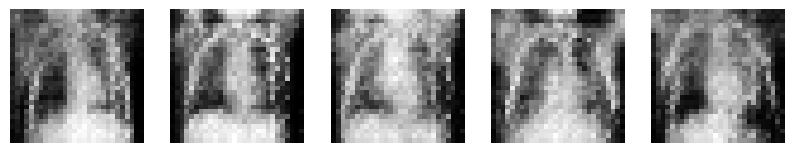

Epoch 91/100 completed. Gen Loss: 0.7749, Disc Loss: 1.3285
Epoch 92/100 completed. Gen Loss: 0.8703, Disc Loss: 1.2800
Epoch 93/100 completed. Gen Loss: 0.7569, Disc Loss: 1.2615
Epoch 94/100 completed. Gen Loss: 0.8322, Disc Loss: 1.2467
Epoch 95/100 completed. Gen Loss: 0.8221, Disc Loss: 1.3364
Epoch 96/100 completed. Gen Loss: 0.7993, Disc Loss: 1.2761
Epoch 97/100 completed. Gen Loss: 0.7782, Disc Loss: 1.2075
Epoch 98/100 completed. Gen Loss: 0.7824, Disc Loss: 1.2837
Epoch 99/100 completed. Gen Loss: 0.8313, Disc Loss: 1.1823
Epoch 100/100 completed. Gen Loss: 0.7736, Disc Loss: 1.3321


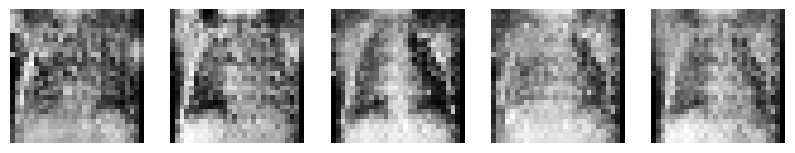

Training finished.


In [49]:
import time
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Number of epochs (full passes through the dataset)
EPOCHS = 100

# Display images every this many epochs
DISPLAY_STEP = 10

# Track losses
generator_losses = []
discriminator_losses = []

# Define generate_and_show_images function before the training loop
def generate_and_show_images(num_images=5):
    noise = tf.random.normal([num_images, noise_dim])
    generated_images = generator(noise, training=False)

    # Normalize to [0, 1] for better visualization
    generated_images = (generated_images + 1) / 2  # Convert to [0, 1]

    # Plot the images
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(generated_images[i].numpy().squeeze(), cmap='gray')  # Remove extra dimensions for display
        plt.axis('off')
    plt.show()

# Start training
for epoch in range(EPOCHS):
    start = time.time()

    for batch in train_dataset:  # train_dataset is a tf.data.Dataset
        disc_loss, gen_loss, _ = train_step(batch)

    # Save losses for monitoring
    generator_losses.append(gen_loss)
    discriminator_losses.append(disc_loss)

    # Print progress
    print(f"Epoch {epoch+1}/{EPOCHS} completed. Gen Loss: {gen_loss:.4f}, Disc Loss: {disc_loss:.4f}")

    # Show generated samples every few epochs
    if (epoch + 1) % DISPLAY_STEP == 0:
        generate_and_show_images(num_images=5)

print("Training finished.")

# **Visualize Generated Images**
After training the GAN, it's good practice to visualize some of the generated images periodically to monitor the progress. Here’s the code to visualize the generated images from the GAN:

In [50]:
# Generate and show a few images from the generator
def generate_and_show_images(num_images=5):
    noise = tf.random.normal([num_images, noise_dim])
    generated_images = generator(noise, training=False)

    # Normalize to [0, 1] for better visualization
    generated_images = (generated_images + 1) / 2  # Convert to [0, 1]

    # Plot the images
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(generated_images[i].numpy().squeeze(), cmap='gray')  # Remove extra dimensions for display
        plt.axis('off')
    plt.show()


Call this function after every few epochs to monitor the quality of generated images:

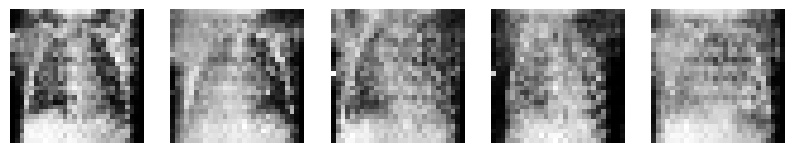

In [51]:
# Show generated images after every 10 epochs
if (epoch + 1) % DISPLAY_STEP == 0:
    generate_and_show_images(num_images=5)


# **Plot Generator and Discriminator Loss Curves**
It’s important to visualize the loss curves of both the generator and the discriminator over time to check if the GAN is learning properly. Here’s how you can plot the loss curves:

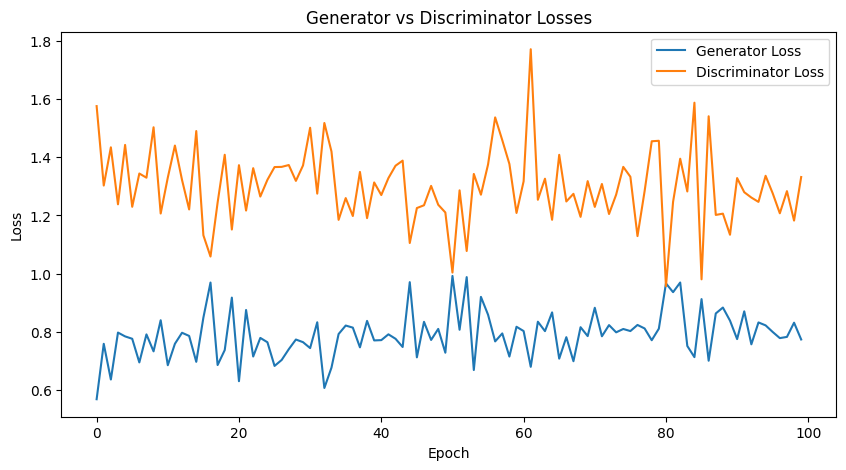

In [52]:
# After training loop, plot losses
plt.figure(figsize=(10, 5))
plt.plot(generator_losses, label='Generator Loss')
plt.plot(discriminator_losses, label='Discriminator Loss')
plt.title('Generator vs Discriminator Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# **Compare Synthetic vs Real Images**
After training, you can compare some real chest X-ray images from the test set with synthetic ones generated by the GAN. This can help assess how realistic the generator’s images are.



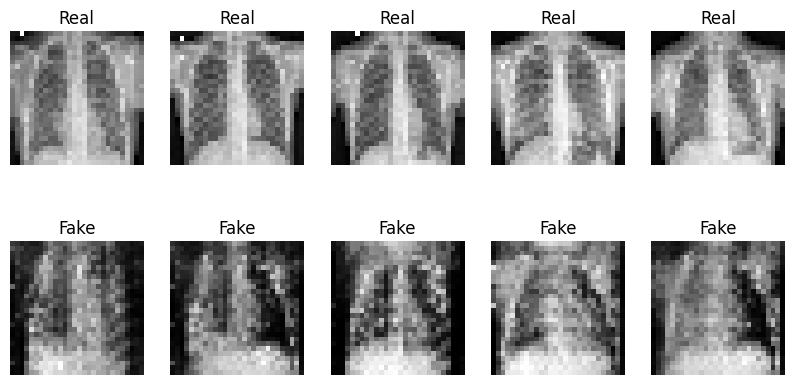

In [54]:
# Compare synthetic vs real images
def compare_real_and_fake_images(real_images, num_images=5):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        # Real image
        plt.subplot(2, num_images, i + 1)
        plt.imshow(real_images[i].squeeze(), cmap='gray') # Removed .numpy()
        plt.title('Real')
        plt.axis('off')

        # Fake image
        noise = tf.random.normal([1, noise_dim])
        generated_image = generator(noise, training=False)
        plt.subplot(2, num_images, num_images + i + 1)
        plt.imshow(generated_image.numpy().squeeze(), cmap='gray')
        plt.title('Fake')
        plt.axis('off')

    plt.show()

# Call the function with test images
compare_real_and_fake_images(test_images[:5])

# **Plot Loss Curves After Training**
Lastly, to track how well your model is learning over time, plotting the loss curves of both the generator and the discriminator can give you insights into the model's behavior:

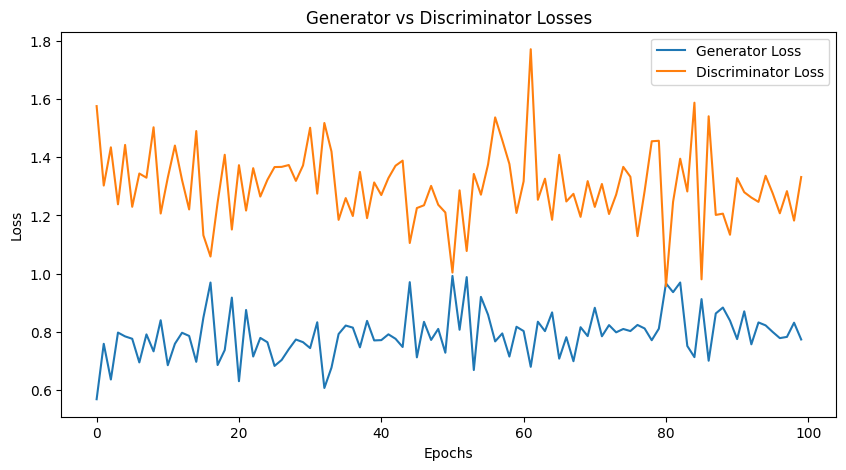

In [55]:
# Plot generator and discriminator loss after training
plt.figure(figsize=(10, 5))
plt.plot(generator_losses, label="Generator Loss")
plt.plot(discriminator_losses, label="Discriminator Loss")
plt.title('Generator vs Discriminator Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Use Synthetic Images for Downstream Tasks
Once you have a trained generator, you can use it to generate synthetic images that might be used for downstream tasks, such as:

- Data augmentation (add more training data for other models)

- Anomaly detection

- Fine-tuning other models on synthetic data

For example, to generate synthetic images for data augmentation, you can simply run:




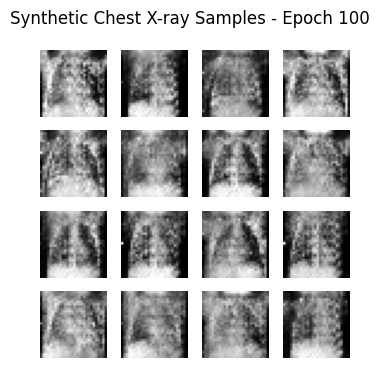

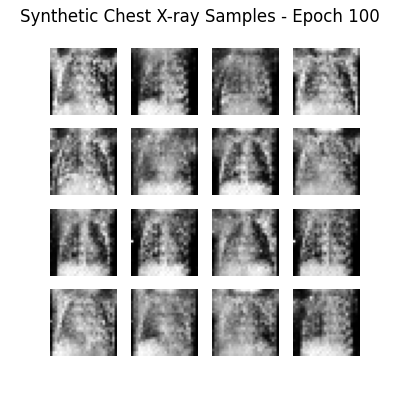

In [58]:
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import Image, display

# 🔧 Set your noise dimension (should match what you used to train the GAN)
noise_dim = 100

# 🧠 Define the function to generate and save images
def generate_and_save_images(model, epoch, test_input):
    predictions = model(test_input, training=False)  # Generate images from noise
    predictions = (predictions + 1) / 2.0  # Scale from [-1, 1] to [0, 1]

    fig = plt.figure(figsize=(4, 4))

    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i + 1)
        plt.imshow(predictions[i, :, :, 0], cmap='gray')  # Show grayscale image
        plt.axis('off')

    plt.suptitle(f'Synthetic Chest X-ray Samples - Epoch {epoch}')
    file_name = f'image_at_epoch_{epoch:04d}.png'
    plt.savefig(file_name)
    plt.show()

    # Display the saved image inline (for Colab or notebooks)
    display(Image(filename=file_name))


# 📦 Generate test noise input (for 16 synthetic images in a 4x4 grid)
test_input = tf.random.normal([16, noise_dim])

# 🖼️ Generate and display images (e.g., at epoch 100)
generate_and_save_images(generator, epoch=100, test_input=test_input)


# **Save Your Trained Models**
After training your GAN, you can save the generator and discriminator models for future use. This allows you to load the trained models without retraining them.


In [65]:
# Save the models
from keras.models import load_model
generator = load_model('generator_model.keras')
discriminator = load_model('discriminator_model.keras')

import os

# Check for saved model files
print("Generator saved:", os.path.exists("generator_model.keras"))
print("Discriminator saved:", os.path.exists("discriminator_model.keras"))

# Check for checkpoint files
print("\nCheckpoint contents:")
print(os.listdir('./training_checkpoints'))



Generator saved: True
Discriminator saved: True

Checkpoint contents:
['ckpt-2.index', 'ckpt-1.index', 'ckpt-1.data-00000-of-00001', 'ckpt-2.data-00000-of-00001', 'checkpoint']


You can later reload the models for further training or inference:

In [66]:
# Load saved models
generator = tf.keras.models.load_model('generator_model.h5')
discriminator = tf.keras.models.load_model('discriminator_model.h5')


# **This means:**

You can still use the model for predictions or generating images

But if you want to continue training, you'll need to compile it again manually

# If You're Only Using It to Generate Images (e.g., for GAN inference):
You're good to go — no need to compile.

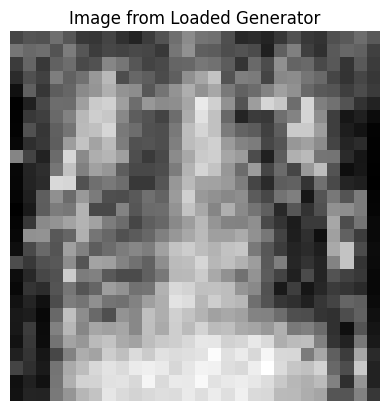

In [67]:
noise = tf.random.normal([1, 100])
fake_image = generator(noise, training=False)

plt.imshow(fake_image[0, :, :, 0] * 127.5 + 127.5, cmap='gray')
plt.title("Image from Loaded Generator")
plt.axis("off")
plt.show()
